In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import chisquare, chi2_contingency
from scipy.stats import pearsonr
import statsmodels

# **SAD data**

In [2]:
dfLt = pd.read_csv('SAD_lh_thickness_stats.csv')
dfRt = pd.read_csv('SAD_rh_thickness_stats.csv')
sublist = pd.read_csv('scanfile_combined.csv')
pheno_demo = pd.read_csv('pheno_demo_combined.csv')
func = pd.read_csv('BNA_significantROIs.csv')

In [3]:
df_temp1 = pd.merge(sublist, dfLt, on='Subject', how='inner')

In [4]:
df_temp2 = pd.merge(df_temp1, dfRt, on='Subject', how='inner')

In [5]:
df = pd.merge(df_temp2, func, on='Subject', how='inner')

In [6]:
df2 = pd.merge(df, pheno_demo, on='Subject', how='inner')

In [7]:
df2['Group'].value_counts()

1    140
2    115
Name: Group, dtype: int64

In [8]:
df2.shape

(255, 95)

In [9]:
SAD = df2[df2['Group']== 1]
HC = df2[df2['Group']== 2]

In [10]:
df2['Group'].value_counts()

1    140
2    115
Name: Group, dtype: int64

In [11]:
SAD['Gender'].value_counts()

2.0    98
1.0    42
Name: Gender, dtype: int64

In [12]:
HC['Gender'].value_counts()

2.0    70
1.0    43
Name: Gender, dtype: int64

In [11]:
HC['LSAS_Total '].value_counts()

0.0     7
10.0    6
2.0     6
11.0    6
8.0     5
4.0     5
6.0     4
1.0     4
7.0     4
20.0    4
12.0    3
3.0     3
14.0    3
17.0    3
27.0    2
18.0    2
31.0    2
34.0    1
32.0    1
29.0    1
36.0    1
16.0    1
39.0    1
26.0    1
19.0    1
21.0    1
13.0    1
24.0    1
5.0     1
25.0    1
Name: LSAS_Total , dtype: int64

In [13]:
sublist['Include'].value_counts()

1    258
Name: Include, dtype: int64

In [ ]:
for column in df2.columns:
    print(column)

In [14]:
cols = df2.loc[:,'lh_bankssts_thickness':'precentral64_2'].columns

In [21]:
fs_pvals = pd.DataFrame()
for column in cols:
    test = ttest_ind(SAD[column], HC[column])
    fs_pvals[column] = test.pvalue
    print(column, test.statistic, test.pvalue)

lh_bankssts_thickness 0.4788676603735181 0.6324463797717932
lh_caudalanteriorcingulate_thickness -1.5247414053199924 0.12857264639569707
lh_caudalmiddlefrontal_thickness 0.739011874898341 0.4605848441929101
lh_cuneus_thickness 2.8351979657607234 0.004949744700543584
lh_entorhinal_thickness -1.0021036623896253 0.3172509961188372
lh_fusiform_thickness -0.718118741691252 0.4733466781844067
lh_inferiorparietal_thickness 0.371131245136086 0.7108503640993344
lh_inferiortemporal_thickness 0.4217954621131691 0.6735324901469298
lh_isthmuscingulate_thickness -0.8493468764031228 0.39649126851694405
lh_lateraloccipital_thickness 1.522542011549651 0.12912221951271916
lh_lateralorbitofrontal_thickness 1.7495365106396146 0.08141080320116705
lh_lingual_thickness 1.0135803351633679 0.311751382645595
lh_medialorbitofrontal_thickness 1.1073338661049854 0.2692012844407949
lh_middletemporal_thickness -0.37145751039072733 0.7106076830907657
lh_parahippocampal_thickness -0.5319925904696737 0.5951979657434142

In [34]:
sig_cols = ['lh_cuneus_thickness', 'lh_rostralanteriorcingulate_thickness', 'rh_cuneus_thickness', 'rh_pericalcarine_thickness', 
            'rh_precuneus_thickness', 'rh_superiorparietal_thickness', 'amyg212', 'pcc152', 'insula163_1', 
            'insula163_2', 'parahipp118', 'parahipp116', 'parahipp115', 'precentral64_1', 'precentral64_2']

In [12]:
df3 = df2.dropna(subset=['BDI_Total ','LSAS_Total '])

In [13]:
pheno_demo.columns

Index(['Subject', 'Dx', 'BDI_Total ', 'LSAS_Total ', 'Age', 'Gender',
       'Race (1 = White, 2 = Black, 3 = Asian, 4 = Other)'],
      dtype='object')

In [14]:
df2['Study (1=ABM, 2=PSPC, 3=Shared)'].value_counts()

3    200
1     35
2     20
Name: Study (1=ABM, 2=PSPC, 3=Shared), dtype: int64

In [15]:
sublist['Study (1=ABM, 2=PSPC, 3=Shared)'].value_counts()

3    201
1     37
2     20
Name: Study (1=ABM, 2=PSPC, 3=Shared), dtype: int64

In [16]:
sublist['Group'].value_counts()

1    142
2    116
Name: Group, dtype: int64

In [17]:
SAD = df3[df3['Group']== 1]
HC = df3[df3['Group']== 2]

In [18]:
HC['meanFD'].describe()

count    82.000000
mean      0.176935
std       0.095521
min       0.066800
25%       0.117075
50%       0.155650
75%       0.192125
max       0.653500
Name: meanFD, dtype: float64

In [19]:
HC['BDI_Total '].describe()

count    82.000000
mean      1.134146
std       1.776126
min       0.000000
25%       0.000000
50%       0.000000
75%       1.750000
max       7.000000
Name: BDI_Total , dtype: float64

In [26]:
HC['LSAS_Total '].describe()

count    82.000000
mean     11.500000
std       9.786928
min       0.000000
25%       4.000000
50%      10.000000
75%      17.000000
max      39.000000
Name: LSAS_Total , dtype: float64

In [20]:
HC['Age'].describe()

count    82.000000
mean     25.195122
std       7.682655
min      18.000000
25%      20.000000
50%      23.000000
75%      28.000000
max      59.000000
Name: Age, dtype: float64

In [21]:
SAD['Age'].describe()

count    108.000000
mean      24.805556
std        6.451050
min       18.000000
25%       20.000000
50%       23.000000
75%       27.000000
max       47.000000
Name: Age, dtype: float64

In [22]:
SAD['BDI_Total '].describe()

count    108.000000
mean      18.527778
std       10.731610
min        0.000000
25%       10.750000
50%       19.000000
75%       27.000000
max       44.000000
Name: BDI_Total , dtype: float64

In [37]:
test = ttest_ind(SAD['Age'], HC['Age'])
print(test.statistic, test.pvalue)

-0.7173684342961736 0.47380858832614403


In [38]:
test = ttest_ind(SAD['meanFD'], HC['meanFD'])
print(test.statistic, test.pvalue)

-0.8628568300152505 0.3890333715189771


In [42]:
chi2_contingency(SAD['Gender'], HC['Gender'])

(0.0,
 1.0,
 0,
 array([2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2.,
        2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2.,
        1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2., 2., 1., 2.,
        2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 2.,
        2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2.,
        2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2.,
        2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 2., 2., 2.,
        1., 2., 1., 2., 2., 2., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2.,
        2., 1., 2., 1.]))

In [23]:
test = ttest_ind(SAD['BDI_Total '], HC['BDI_Total '])
print(test.statistic, test.pvalue)

14.517698803494254 1.6007004659959947e-32


In [25]:
test = ttest_ind(SAD['LSAS_Total '], HC['LSAS_Total '])
print(test.statistic, test.pvalue)

29.967412510348606 1.6076569858784733e-73


In [35]:
for column in sig_cols:
    LSAS_corr = pearsonr(df3['LSAS_Total '], df3[column])
    BDI_corr = pearsonr(df3['BDI_Total '], df3[column])
    print(column, "LSAS pearsonr, p-val:", LSAS_corr)
    print(column, "BDI pearsonr, p-val:", BDI_corr)

lh_cuneus_thickness LSAS pearsonr, p-val: (0.14306090156453283, 0.04894322760213944)
lh_cuneus_thickness BDI pearsonr, p-val: (0.17851644708096237, 0.013729309147634192)
lh_rostralanteriorcingulate_thickness LSAS pearsonr, p-val: (-0.11659138039070144, 0.10916349727527191)
lh_rostralanteriorcingulate_thickness BDI pearsonr, p-val: (-0.21741835451016722, 0.0025845885385046953)
rh_cuneus_thickness LSAS pearsonr, p-val: (0.15445283237270652, 0.03336022788262833)
rh_cuneus_thickness BDI pearsonr, p-val: (0.20909514263998652, 0.00378879388713008)
rh_pericalcarine_thickness LSAS pearsonr, p-val: (0.0787127863177222, 0.2803662445528647)
rh_pericalcarine_thickness BDI pearsonr, p-val: (0.09461179078112347, 0.1941354133051208)
rh_precuneus_thickness LSAS pearsonr, p-val: (0.0949930117365369, 0.1923366332080412)
rh_precuneus_thickness BDI pearsonr, p-val: (0.14008414757915905, 0.05389237505626822)
rh_superiorparietal_thickness LSAS pearsonr, p-val: (0.0867928925582278, 0.23376702128948668)
rh_su

In [36]:
for column in sig_cols:
    LSAS_corr = pearsonr(SAD['LSAS_Total '], SAD[column])
    BDI_corr = pearsonr(SAD['BDI_Total '], SAD[column])
    print(column, "LSAS pearsonr, p-val:", LSAS_corr)
    print(column, "BDI pearsonr, p-val:", BDI_corr)

lh_cuneus_thickness LSAS pearsonr, p-val: (0.22328991256725983, 0.020184268594055102)
lh_cuneus_thickness BDI pearsonr, p-val: (0.23799677579528214, 0.013127044124079465)
lh_rostralanteriorcingulate_thickness LSAS pearsonr, p-val: (-0.11788775859953673, 0.22432339359492318)
lh_rostralanteriorcingulate_thickness BDI pearsonr, p-val: (-0.32045387544510895, 0.0007218867425679442)
rh_cuneus_thickness LSAS pearsonr, p-val: (0.07721305430146809, 0.4270375538850835)
rh_cuneus_thickness BDI pearsonr, p-val: (0.22831726494116172, 0.017472336928074872)
rh_pericalcarine_thickness LSAS pearsonr, p-val: (0.16001629947473398, 0.09807351931521568)
rh_pericalcarine_thickness BDI pearsonr, p-val: (0.1629245882163689, 0.09203939159914844)
rh_precuneus_thickness LSAS pearsonr, p-val: (0.15063671094171327, 0.11967471964725619)
rh_precuneus_thickness BDI pearsonr, p-val: (0.19948941677775936, 0.03846311554393436)
rh_superiorparietal_thickness LSAS pearsonr, p-val: (0.18011942406267126, 0.06213071595509554)

In [37]:
for column in sig_cols:
    LSAS_corr = pearsonr(HC['LSAS_Total '], HC[column])
    BDI_corr = pearsonr(HC['BDI_Total '], HC[column])
    print(column, "LSAS pearsonr, p-val:", LSAS_corr)
    print(column, "BDI pearsonr, p-val:", BDI_corr)

lh_cuneus_thickness LSAS pearsonr, p-val: (-0.03180043512110674, 0.776704598206506)
lh_cuneus_thickness BDI pearsonr, p-val: (-0.15495439869698419, 0.16451610378808093)
lh_rostralanteriorcingulate_thickness LSAS pearsonr, p-val: (0.025915912843784143, 0.8172257703682225)
lh_rostralanteriorcingulate_thickness BDI pearsonr, p-val: (0.04766076477312961, 0.6706889342264388)
rh_cuneus_thickness LSAS pearsonr, p-val: (0.026871637642843435, 0.810608844662463)
rh_cuneus_thickness BDI pearsonr, p-val: (-0.10982181845745358, 0.3260079478268421)
rh_pericalcarine_thickness LSAS pearsonr, p-val: (0.10304108077939665, 0.356942189099843)
rh_pericalcarine_thickness BDI pearsonr, p-val: (-0.07231887169136472, 0.5184944680210049)
rh_precuneus_thickness LSAS pearsonr, p-val: (-0.02472653147498808, 0.8254782404270034)
rh_precuneus_thickness BDI pearsonr, p-val: (-0.06960483307461643, 0.534351865431256)
rh_superiorparietal_thickness LSAS pearsonr, p-val: (0.12372384888223628, 0.26810866623243806)
rh_superi

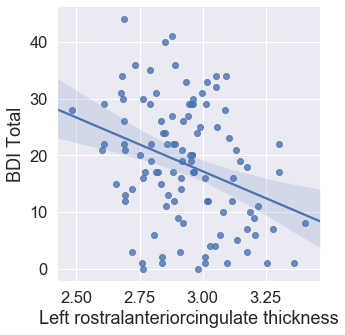

In [38]:
sns.set(font_scale=1.5)
p2 = sns.lmplot(x="lh_rostralanteriorcingulate_thickness", y="BDI_Total ", data=SAD)
p2.set_axis_labels("Left rostralanteriorcingulate thickness", "BDI Total")

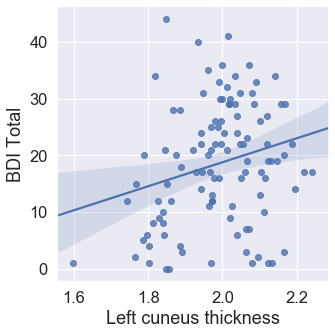

In [39]:
sns.set(font_scale=1.5)
p2 = sns.lmplot(x="lh_cuneus_thickness", y="BDI_Total ", data=SAD)
p2.set_axis_labels("Left cuneus thickness", "BDI Total")

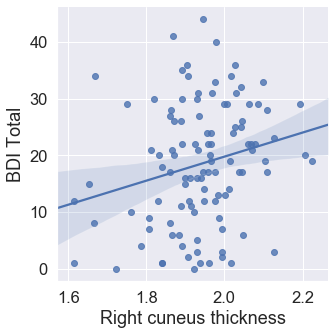

In [40]:
sns.set(font_scale=1.5)
p2 = sns.lmplot(x="rh_cuneus_thickness", y="BDI_Total ", data=SAD)
p2.set_axis_labels("Right cuneus thickness", "BDI Total")

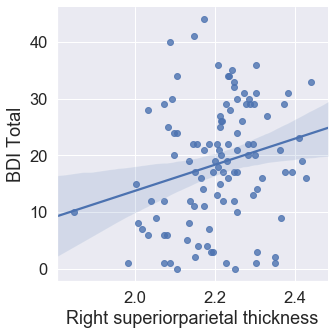

In [41]:
sns.set(font_scale=1.5)
p2 = sns.lmplot(x="rh_superiorparietal_thickness", y="BDI_Total ", data=SAD)
p2.set_axis_labels("Right superiorparietal thickness", "BDI Total")

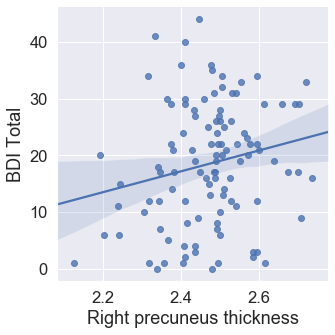

In [42]:
sns.set(font_scale=1.5)
p2 = sns.lmplot(x="rh_precuneus_thickness", y="BDI_Total ", data=SAD)
p2.set_axis_labels("Right precuneus thickness", "BDI Total")

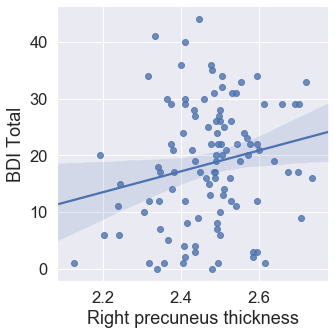

In [43]:
sns.set(font_scale=1.5)
p2 = sns.lmplot(x="rh_precuneus_thickness", y="BDI_Total ", data=SAD)
p2.set_axis_labels("Right precuneus thickness", "BDI Total")